In [135]:
#Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [136]:
digits = load_digits()  # Load dataset containing 8x8 images of handwritten digits
# Display dataset's structure and attributes
dir(digits)


['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [149]:
X = pd.DataFrame(digits.data, columns=digits.feature_names)  # Feature matrix (8x8 image pixels flattened into 64 features)
print("Getting first 5 rows:\n",X.head() ) # Display the first 5 rows of the features

Getting first 5 rows:
    pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0        0.0        0.0        5.0       13.0        9.0        1.0   
1        0.0        0.0        0.0       12.0       13.0        5.0   
2        0.0        0.0        0.0        4.0       15.0       12.0   
3        0.0        0.0        7.0       15.0       13.0        1.0   
4        0.0        0.0        0.0        1.0       11.0        0.0   

   pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
0        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1        0.0        0.0        0.0        0.0  ...        0.0        0.0   
2        0.0        0.0        0.0        0.0  ...        5.0        0.0   
3        0.0        0.0        0.0        8.0  ...        9.0        0.0   
4        0.0        0.0        0.0        0.0  ...        0.0        0.0   

   pixel_7_0  pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  \
0        0.0        0.

In [150]:
y = pd.Series(digits.target)  # Target vector (labels for digits)
y[:5]  # Display first 5 target values

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [151]:
#   Splitting data into training and testing sets (80%-20% split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [158]:
#  Checking the shapes of the training and test datasets

print(X_train.shape)  # Shape of training feature matrix
print(X_test.shape)   # Shape of test feature matrix
print(y_train.shape ) # Shape of training target vector
print(y_test.shape )  # Shape of test target vector


(1437, 64)
(360, 64)
(1437,)
(360,)


In [ ]:
#  Scaling the features to standardize them (mean = 0, variance = 1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit on training data and transform
X_test = scaler.transform(X_test)        # Only transform test data


In [ ]:
#  Training the SVM classifier with an RBF kernel

model = SVC(kernel='rbf', C=1, gamma=0.01)  # Support Vector Machine with Radial Basis Function kernel
model.fit(X_train, y_train)  # Train the model on the training data


SVC(C=1, gamma=0.01)

In [155]:
# Making predictions on the test set

y_pred = model.predict(X_test)
y_pred[:6]  # Display first 6 predictions


array([6, 9, 3, 7, 2, 1])

In [143]:
# Calculating training and testing accuracy
y_train_pred = model.predict(X_train)  # Predictions on training set

print("Training Accuracy:", accuracy_score(y_train, y_train_pred))  # Training accuracy
print("Testing Accuracy :", accuracy_score(y_test, y_pred))  # Testing accuracy

# Displaying the classification report (precision, recall, f1-score)
print("Classification Report:\n", classification_report(y_test, y_pred))


Training Accuracy: 0.9965205288796103
Testing Accuracy : 0.9833333333333333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       0.97      1.00      0.99        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.96      0.98      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



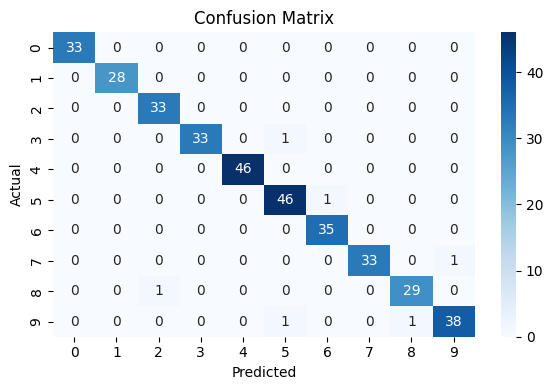

In [156]:
# Plotting the confusion matrix for better understanding of misclassifications

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')  # Confusion matrix plot
plt.title("Confusion Matrix")  # Title for the plot
plt.xlabel("Predicted")  # X-axis label
plt.ylabel("Actual")  # Y-axis label
plt.tight_layout()  # Ensure everything fits without overlap
plt.show()  # Display the plot
